# <center><font color=blue>Credit Approval</font>

<font color=blue size=4>1-Needed Packages

In [1]:
import os
import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns
import matplotlib.pylab as plt
import sklearn.metrics as sk
from sklearn.model_selection import KFold, RepeatedKFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from collections import defaultdict
from itertools import chain, combinations
from copy import deepcopy
# pip install datawig
import datawig

pd.options.mode.chained_assignment = None  # default='warn'

/home/labib/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


<font color=blue size=4>2- Load Data</font> 

In [2]:
## In case of using Google Colab
# from google.colab import drive
# drive.mount('/content/drive')
# file = '/content/drive/MyDrive/Colab Notebooks/crx.data.csv'
file = os.path.abspath("data/crx.data.csv")
datasetOriginal = pd.read_csv(file, header=None)
print('Dataset initial state:')
datasetOriginal.head(30)

Dataset initial state:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,00360,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,00164,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,00080,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,00180,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442,+


In [3]:
datasetOriginal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
0     690 non-null object
1     690 non-null object
2     690 non-null float64
3     690 non-null object
4     690 non-null object
5     690 non-null object
6     690 non-null object
7     690 non-null float64
8     690 non-null object
9     690 non-null object
10    690 non-null int64
11    690 non-null object
12    690 non-null object
13    690 non-null object
14    690 non-null int64
15    690 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


<font color=blue size=4>3- Analyze Data</font> 

In [4]:
# Name columns.
datasetOriginal.columns = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m",
                           "n", "o", "is_approved"]

# Analyze data types based on type of data, as its not always correctly recognized.
floatType = 'float'
intType = 'int'
nonObjectDataTypes = {
   "b": floatType,
   "c": floatType,
   "h": floatType,
   "k": intType,
   "n": intType,
   "o": intType,
}

continuousDataColumns = list(nonObjectDataTypes.keys())
categoricalDataColumns = np.setdiff1d(datasetOriginal.columns,continuousDataColumns)

# Make data more suitable for learning by converting labels to 0,1
datasetOriginal['is_approved'].replace({"+": 1, "-": 0}, inplace=True)

# Gather missing data columns and their data types
missingDataColumns = {}
continuousType = 'continuous'
categoricalType = 'categorical'
for column in datasetOriginal.columns:
    if (datasetOriginal[column] == '?').any():
        if column in nonObjectDataTypes:
            dataType = continuousType
        else:
            dataType = categoricalType
        missingDataColumns[column] = dataType
        # replace missing value with NaN
        datasetOriginal[column] = datasetOriginal[column].replace('?', np.nan)

# all variations will be collected here, beside saving in csv files
datasets = {
    "original": datasetOriginal
}

print('\nMissing data columns:')
missingDataColumns, datasetOriginal.isnull().sum()


Missing data columns:


/home/labib/anaconda3/lib/python3.8/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


({'a': 'categorical',
  'b': 'continuous',
  'd': 'categorical',
  'e': 'categorical',
  'f': 'categorical',
  'g': 'categorical',
  'n': 'continuous'},
 a              12
 b              12
 c               0
 d               6
 e               6
 f               9
 g               9
 h               0
 i               0
 j               0
 k               0
 l               0
 m               0
 n              13
 o               0
 is_approved     0
 dtype: int64)

<font color=blue size=4>4- Missing data feasible handling options -there are non-feasible ones as well-</font>
    
<font color=grey size=3>4.1- Remove rows with missing data.</font>

<font color=grey size=3>4.2- Fill continuous data with columns mean/median values and categorical data with columns most frequent category.</font> 

<font color=grey size=3>4.3- Fill based on predictive models between mostly correlated columns.</font> 

<font color=grey size=3>4.4- Fill using unsupervised learning.</font> 

<font color=grey size=3>4.5- Fill using deep learning.</font> 

<font color=blue size=4>4.1- Remove rows with missing data</font>

In [5]:
# 4.1. Remove rows with missing data
# Pros:
#  A model trained with the removal of all missing values creates a robust model.
# Cons:
#  Loss of a lot of information.
#  Works poorly if the percentage of missing values is excessive in comparison to the complete dataset.
datasetWithRemovedRows = datasetOriginal.copy(deep=True)
# remove rows where any column has value NaN
datasetWithRemovedRows = datasetWithRemovedRows.dropna()
# set data types correctly after removing rows with NaN
for column in nonObjectDataTypes:
    datasetWithRemovedRows[column] = datasetWithRemovedRows[column].astype(nonObjectDataTypes[column])
# save data to a new csv
datasetWithRemovedRows.to_csv("data/crx.data_removed_missing.csv", index=False, encoding='utf8')
datasets['after removing missing rows'] = datasetWithRemovedRows
# validate rows removal is done correctly
assert datasetWithRemovedRows.isnull().any().any() == False
assert datasetOriginal.shape[0] > datasetWithRemovedRows.shape[0]

print('\nContinuous columns info:')
datasetWithRemovedRows.describe()


Continuous columns info:


,b,c,h,k,n,o,is_approved
count,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000
mean,31.503813,4.829533,2.244296,2.502297,180.359877,1013.761103,0.453292
std,11.838267,5.027077,3.371120,4.968497,168.296811,5253.278504,0.498195
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.580000,1.040000,0.165000,0.000000,73.000000,0.000000,0.000000
50%,28.420000,2.835000,1.000000,0.000000,160.000000,5.000000,0.000000
75%,38.250000,7.500000,2.625000,3.000000,272.000000,400.000000,1.000000
max,76.750000,28.000000,28.500000,67.000000,2000.000000,100000.000000,1.000000


<font color=blue size=4>4.2- Fill continuous data with columns mean values and categorical data with columns most frequent category</font>

In [6]:
# 4.2. Fill continuous data with columns mean values and categorical data with columns most frequent category
# Pros:
#  Prevent data loss which results in deletion of rows or columns.
#  Works well with a small dataset and easy to implement.
# Cons:
#  Can cause data leakage.
#  Does not factor the covariance between features (for continuous ones).
datasetWithCalculatedRows = datasetOriginal.copy(deep=True)
for column in missingDataColumns:
    if missingDataColumns[column] == continuousType:
        imp = SimpleImputer(missing_values=np.nan, strategy='median')
        imp.fit(datasetWithRemovedRows[column].values.reshape(-1, 1))
        datasetWithCalculatedRows[column] = imp.transform(datasetWithCalculatedRows[column].values.reshape(-1, 1))
    else:
        imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        imp.fit(datasetWithRemovedRows[column].values.reshape(-1, 1))
        datasetWithCalculatedRows[column] = imp.transform(datasetWithCalculatedRows[column].values.reshape(-1, 1))
# set data types correctly after calculating rows with NaN
for column in nonObjectDataTypes:
    datasetWithCalculatedRows[column] = datasetWithCalculatedRows[column].astype(nonObjectDataTypes[column])
# save data to a new csv
datasetWithCalculatedRows.to_csv("data/crx.data_calculated_missing.csv", index=False, encoding='utf8')
datasets['after calculating missing rows'] = datasetWithCalculatedRows
# validate rows calculation is done correctly
assert datasetWithCalculatedRows.isnull().any().any() == False
assert datasetOriginal.shape[0] == datasetWithCalculatedRows.shape[0]

print('\nContinuous columns correlation:')
corr = datasetWithRemovedRows.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)


Continuous columns correlation:


,b,c,h,k,n,o,is_approved
b,1,0.22,0.42,0.2,-0.085,0.029,0.18
c,0.22,1,0.3,0.27,-0.22,0.12,0.21
h,0.42,0.3,1,0.33,-0.065,0.052,0.33
k,0.2,0.27,0.33,1,-0.12,0.058,0.41
n,-0.085,-0.22,-0.065,-0.12,1,0.073,-0.085
o,0.029,0.12,0.052,0.058,0.073,1,0.17
is_approved,0.18,0.21,0.33,0.41,-0.085,0.17,1


<font color=blue size=4>4.3- Fill based on predictive models between mostly correlated columns</font>

Association rules (node=columnName_rowValue)


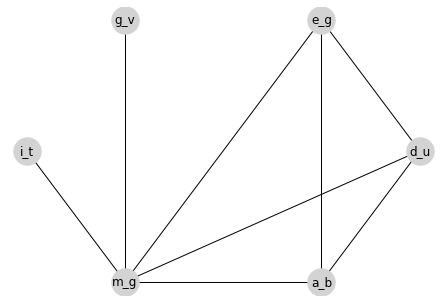

In [23]:
# 4.3. Fill based on predictive models between mostly correlated columns
# Pros:
#  Gives a better result than earlier methods.
#  Takes into account the covariance between missing value column and other columns.
# Cons:
#  Considered only as a proxy for the true values.
datasetWithPredictedRows = datasetOriginal.copy(deep=True)
# Fill continuous-data-type columns based on predictive models between mostly correlated columns
continuousDataColumnsWithoutMissingData = np.append(np.setdiff1d(list(nonObjectDataTypes.keys()),list(missingDataColumns.keys())), 'is_approved')
continuousDataColumnsWithMissingData = np.intersect1d(list(nonObjectDataTypes.keys()), list(missingDataColumns.keys()))
for column in continuousDataColumnsWithMissingData:
    continuousDataColumnsWithoutMissingData = np.append(continuousDataColumnsWithoutMissingData,column)
    continuousDatasetWithRemovedRows = datasetWithRemovedRows[continuousDataColumnsWithoutMissingData]
    continuousDatasetWithPredictedRows = datasetWithPredictedRows[continuousDataColumnsWithoutMissingData]

    xTrain = continuousDatasetWithRemovedRows.drop(column, axis=1)
    yTrain = continuousDatasetWithRemovedRows[column]

    testData = continuousDatasetWithPredictedRows[continuousDatasetWithPredictedRows[column].isnull()]
    xTest = testData.drop(column, axis=1)

    model = LinearRegression()
    model.fit(xTrain, yTrain)
    yPred = model.predict(xTest)
    datasetWithPredictedRows[column][datasetWithPredictedRows[column].isnull()] = np.around(yPred, 2)

# Fill nominal-categoricies-data-type columns
# Apriori algorithm is a straight-forward Association rule mining technique
# to identify underlying relations between different items.
#
# Support in Apriori is the Fraction of transactions that contain an itemset.
# So, the support of item I is defined as the number of transactions containing I divided by the total number of transactions.
#
# Confidence in Apriori is how often items in Y appear in transactions that contain X.
# So, the confidence It’s calculated as the number of transactions containing X and Y divided by the number of transactions containing X.
#
# Frequent Item Set in Apriori is simply all the itemsets that the support satisfies the minimum support threshold.
#
# It’s a bottom-up approach. We started from every single item in the itemset list.
# Then, the candidates are generated by self-joining.
# We extend the length of the itemsets one item at a time.
# The subset test is performed at each stage and the itemsets that contain infrequent subsets are pruned.
# We repeat the process until no more successful itemsets can be derived from the data.
def getAboveMinSup(itemSet, itemSetList, minSup, globalItemSetWithSup):
    freqItemSet = set()
    localItemSetWithSup = defaultdict(int)

    for item in itemSet:
        for itemSet in itemSetList:
            if item.issubset(itemSet):
                globalItemSetWithSup[item] += 1
                localItemSetWithSup[item] += 1

    for item, supCount in localItemSetWithSup.items():
        support = float(supCount / len(itemSetList))
        if(support >= minSup):
            freqItemSet.add(item)

    return freqItemSet


def getUnion(itemSet, length):
    return set([i.union(j) for i in itemSet for j in itemSet if len(i.union(j)) == length])


def pruning(candidateSet, prevFreqSet, length):
    tempCandidateSet = candidateSet.copy()
    for item in candidateSet:
        subsets = combinations(item, length)
        for subset in subsets:
            # if the subset is not in previous K-frequent get, then remove the set
            if(frozenset(subset) not in prevFreqSet):
                tempCandidateSet.remove(item)
                break
    return tempCandidateSet

def powerset(s):
    return chain.from_iterable(combinations(s, r) for r in range(1, len(s)))

def associationRule(freqItemSet, itemSetWithSup, minConf):
    rules = []
    for k, itemSet in freqItemSet.items():
        for item in itemSet:
            subsets = powerset(item)
            for s in subsets:
                confidence = float(
                    itemSetWithSup[item] / itemSetWithSup[frozenset(s)])
                if(confidence > minConf):
                    rules.append([set(s), set(item.difference(s)), confidence])
    return rules


def getItemSetFromList(itemSetList):
    tempItemSet = set()

    for itemSet in itemSetList:
        for item in itemSet:
            tempItemSet.add(frozenset([item]))

    return tempItemSet

def apriori(itemSetList, minSup, minConf):
    C1ItemSet = getItemSetFromList(itemSetList)
    # Final result global frequent itemset
    globalFreqItemSet = dict()
    # Storing global itemset with support count
    globalItemSetWithSup = defaultdict(int)

    L1ItemSet = getAboveMinSup(
        C1ItemSet, itemSetList, minSup, globalItemSetWithSup)
    currentLSet = L1ItemSet
    k = 2

    # Calculating frequent item set
    while(currentLSet):
        # Storing frequent itemset
        globalFreqItemSet[k-1] = currentLSet
        # Self-joining Lk
        candidateSet = getUnion(currentLSet, k)
        # Perform subset testing and remove pruned supersets
        candidateSet = pruning(candidateSet, currentLSet, k-1)
        # Scanning itemSet for counting support
        currentLSet = getAboveMinSup(
            candidateSet, itemSetList, minSup, globalItemSetWithSup)
        k += 1

    rules = associationRule(globalFreqItemSet, globalItemSetWithSup, minConf)
    rules.sort(key=lambda x: x[2]*-1)

    return globalFreqItemSet, rules

graph = nx.Graph()
def plotAssociationRules(rules):
    for rule in rules:
        fromNodes = rule[0]
        toNodes = rule[1]
        for fromNode in fromNodes:
            for toNode in toNodes:
                graph.add_nodes_from([fromNode, toNode])
                graph.add_weighted_edges_from([(fromNode, toNode, rule[2])])

categoricalDataColumnsWithoutMissingData = np.setdiff1d(np.setdiff1d(datasetOriginal.columns,list(nonObjectDataTypes.keys())),list(missingDataColumns.keys()))
categoricalDataColumnsWithMissingData = np.setdiff1d(list(missingDataColumns.keys()), list(nonObjectDataTypes.keys()))

for missingDataColumn in categoricalDataColumnsWithMissingData:
    categoricalDataColumnsWithoutMissingData = np.append(categoricalDataColumnsWithoutMissingData,missingDataColumn)
    categoricalDatasetWithRemovedRows = datasetWithRemovedRows[categoricalDataColumnsWithoutMissingData]
    categoricalDatasetWithPredictedRows = datasetWithPredictedRows[categoricalDataColumnsWithoutMissingData]
    # Make each column unique even if there are common values between columns like `t` and `f`
    for column in categoricalDatasetWithRemovedRows:
        categoricalDatasetWithRemovedRows[column] = [column + '_' + str(rowValue) for rowValue in categoricalDatasetWithRemovedRows[column]]
    # Use apriori to collect association rules
    globalFreqItemSet, rules = apriori(categoricalDatasetWithRemovedRows.to_numpy(), 0.5, 0.5)

    plotAssociationRules(rules)
    
    usefulRules = []
    columnUniqueValues = categoricalDatasetWithRemovedRows[column].unique()
    for rule in rules:
        ruleValues = list(rule[0]) + list(rule[1])
        for columnValue in columnUniqueValues:
            # keep rules that include the column with missing data
            if columnValue in ruleValues:
                usefulRules.append(ruleValues)
    # Rename prediction data similarly to training data to be able to match 
    for column in categoricalDatasetWithPredictedRows[categoricalDatasetWithPredictedRows[column].isnull()]:
        if missingDataColumn != column:
            categoricalDatasetWithPredictedRows[column] = [column + '_' + str(rowValue) for rowValue in categoricalDatasetWithPredictedRows[column]]
    # Predict missing data
    # Keep in mind, some rows might still have no clear association rules to predict.
    # We will use most frequent value for those.
    yPred = [];
    stillHaveMissingValues = False
    for row in categoricalDatasetWithPredictedRows[categoricalDatasetWithPredictedRows[column].isnull()].drop(column, axis=1).to_numpy():
        r = len(row)
        matched = False
        # collect all possible combinations of row starting from the whole row to single column values.
        # first match with association rules is used to predict missing column value.
        while(r >= 1 and matched == False):
            for combination in combinations(row, r):
                if matched == False:
                    for rule in usefulRules:
                        if matched == False and len(np.intersect1d(combination,rule)) == len(combination):
                            # get missing column value from association rule
                            matching = [s for s in rule if missingDataColumn in s]
                            # remove added unique string from matched value
                            yPred.append(matching[0].split('_')[-1])
                            # stop looking for matched values for that row
                            matched = True
            r -= 1
        # if no match found, keep value as `NaN`
        if matched == False:
            stillHaveMissingValues = True
            yPred.append(np.nan)
    datasetWithPredictedRows[missingDataColumn][datasetWithPredictedRows[missingDataColumn].isnull()] = yPred
    if stillHaveMissingValues == True:
        imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        imp.fit(datasetWithPredictedRows[missingDataColumn].values.reshape(-1, 1))
        datasetWithPredictedRows[missingDataColumn] = imp.transform(datasetWithPredictedRows[missingDataColumn].values.reshape(-1, 1))
# set data types correctly after predicting rows with NaN
for column in nonObjectDataTypes:
    datasetWithPredictedRows[column] = datasetWithPredictedRows[column].astype(nonObjectDataTypes[column])
# save data to a new csv
datasetWithPredictedRows.to_csv("data/crx.data_predicted_missing.csv", index=False, encoding='utf8')
datasets['after predicting missing rows'] = datasetWithPredictedRows
# validate rows prediction is done correctly
assert datasetWithPredictedRows.isnull().any().any() == False
assert datasetOriginal.shape[0] == datasetWithPredictedRows.shape[0]

# Visualize association rules
print("Association rules (node=columnName_rowValue)")
nx.draw_shell(graph, with_labels=True, node_size=750, node_color="lightgrey")

<font color=blue size=4>4.4- Fill using unsupervised learning.</font>

In [8]:
# 4.4. Fill using unsupervised learning
# Pros:
# Support more non-linearity between data, as it doesn't need strong correlation  
#  Takes into account the covariance between missing value column and other columns.
# Cons:
#  Considered only as a proxy for the true values.
datasetWithUnsupervisedLearntRows = datasetOriginal.copy(deep=True)

categoriesMap = {}
# Convert categorical columns data to ordinal integers
for column in categoricalDataColumns:
    columnUniqueValues = datasetWithRemovedRows[column].unique()
    categoryMap = ({ index: v for index, v in enumerate(columnUniqueValues) })
    keyList = list(categoryMap.keys())
    valList = list(categoryMap.values())
    categoriesMap[column] = {'keys': keyList, 'values': valList, 'ordinalMap': categoryMap}
    datasetWithUnsupervisedLearntRows[column][datasetWithUnsupervisedLearntRows[column] == datasetWithUnsupervisedLearntRows[column]] = [keyList[valList.index(rowValue)] for rowValue in datasetWithUnsupervisedLearntRows[column] if rowValue == rowValue]
    
imputer = KNNImputer(n_neighbors=2, weights="uniform")
transformedData = imputer.fit_transform(datasetWithUnsupervisedLearntRows)
rotatedTransformedData = transformedData.T
for index, column in enumerate(datasetWithUnsupervisedLearntRows.columns):
    datasetWithUnsupervisedLearntRows[column] = rotatedTransformedData[index]

# Convert ordinal integers to original categorical columns data
for column in categoricalDataColumns:
    datasetWithUnsupervisedLearntRows[column] = [categoriesMap[column]['ordinalMap'][round(rowValue,0)] for rowValue in datasetWithUnsupervisedLearntRows[column]]

# set data types correctly after unsupervised learning rows with NaN
for column in nonObjectDataTypes:
    datasetWithUnsupervisedLearntRows[column] = datasetWithUnsupervisedLearntRows[column].astype(nonObjectDataTypes[column])
# save data to a new csv
datasetWithUnsupervisedLearntRows.to_csv("data/crx.data_unsupervised_learnt_missing.csv", index=False, encoding='utf8')
datasets['after unsupervised learning missing rows'] = datasetWithUnsupervisedLearntRows
# validate rows unsupervised learning is done correctly
assert datasetWithUnsupervisedLearntRows.isnull().any().any() == False
assert datasetOriginal.shape[0] == datasetWithUnsupervisedLearntRows.shape[0]

<font color=blue size=4>4.5- Fill using deep learning.</font>

In [10]:
# 4.5. Fill using deep learning
# Pros:
#  Quite accurate compared to other methods.
#  It supports both CPUs and GPUs.
# Cons:
#  Still can be quite slow with large datasets.
datasetWithDeepLearntRows = datasetOriginal.copy(deep=True)
columns = datasetWithDeepLearntRows.columns 

for column in missingDataColumns:
    df_train = datasetWithDeepLearntRows.dropna()
    df_test = datasetWithDeepLearntRows[datasetWithDeepLearntRows[column].isnull()]
    # Initialize a SimpleImputer model
    imputer = datawig.SimpleImputer(
        input_columns=np.delete(columns,np.where(columns == column)), # column(s) containing information about the column we want to impute
        output_column= column, # the column we'd like to impute values for
        output_path = 'imputer_model' # stores model data and metrics
        )

    # Fit an imputer model on the train data
    imputer.fit(train_df=df_train, num_epochs=50)

    # Impute missing values and return original dataframe with predictions
    imputed = imputer.predict(df_test)
    datasetWithDeepLearntRows[column][datasetWithDeepLearntRows[column].isnull()] = imputed[column+'_imputed']

# set data types correctly after deep learning rows with NaN
for column in nonObjectDataTypes:
    datasetWithDeepLearntRows[column] = datasetWithDeepLearntRows[column].astype(nonObjectDataTypes[column])
# save data to a new csv
datasetWithDeepLearntRows.to_csv("data/crx.data_deep_learnt_missing.csv", index=False, encoding='utf8')
datasets['after deep learning missing rows'] = datasetWithDeepLearntRows
# validate rows deep learning is done correctly
assert datasetWithDeepLearntRows.isnull().any().any() == False
assert datasetOriginal.shape[0] == datasetWithDeepLearntRows.shape[0]

2021-02-05 07:43:48,030 [INFO]  NumExpr defaulting to 8 threads.
2021-02-05 07:43:48,290 [INFO]  
========== start: fit model
2021-02-05 07:43:48,291 [WARNING]  Already bound, ignoring bind()
2021-02-05 07:43:48,498 [INFO]  Epoch[0] Batch [0-19]	Speed: 1729.69 samples/sec	cross-entropy=0.726355	a-accuracy=0.656250
2021-02-05 07:43:48,635 [INFO]  Epoch[0] Train-cross-entropy=0.658437
2021-02-05 07:43:48,636 [INFO]  Epoch[0] Train-a-accuracy=0.687500
2021-02-05 07:43:48,636 [INFO]  Epoch[0] Time cost=0.342
2021-02-05 07:43:48,646 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2021-02-05 07:43:48,692 [INFO]  Epoch[0] Validation-cross-entropy=0.511019
2021-02-05 07:43:48,694 [INFO]  Epoch[0] Validation-a-accuracy=0.775000
2021-02-05 07:43:48,895 [INFO]  Epoch[1] Batch [0-19]	Speed: 1626.58 samples/sec	cross-entropy=0.597761	a-accuracy=0.675000
2021-02-05 07:43:49,073 [INFO]  Epoch[1] Train-cross-entropy=0.567824
2021-02-05 07:43:49,074 [INFO]  Epoch[1] Train-a-accuracy=0.721

<font color=blue size=4>6- Transform Data.</font>

In [11]:
# Transform Categorical data to numeric
def categoricalTransform(dataset):
    for i in dataset.columns:
        if dataset[i].dtypes=='object':
            dataset[i]=LabelEncoder().fit_transform(dataset[i])
    return dataset

# Normalize Continuous data by min/max scaling
def normTransform(dataset):
    for col in continuousDataColumns:
        maximum=dataset[col].max()
        minimum=dataset[col].min()
        dataset[col]=dataset[col].map(lambda a: (a-minimum)/(maximum-minimum))
    return dataset

# Standardize Continuous data 
def standTransform(dataset):
    for col in continuousDataColumns:
        std=dataset[col].std()
        mean=dataset[col].mean()
        dataset[col]=dataset[col].map(lambda a: (a-mean)/std)
    return dataset

# Log Continuous data (should be followed by norm/stand transformation)
def log(x):
    if x == 0:
        x = 1 
    return np.log2(x)
def logTransform(dataset):
    for col in continuousDataColumns:
        dataset[col]=dataset[col].map(log)
    return dataset

In [12]:
datasetWithRemovedRowsAllNumeric = datasetWithRemovedRows.copy(deep=True)
categoricalTransform(datasetWithRemovedRowsAllNumeric)

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,is_approved
0,1,30.83,0.000,1,0,12,7,1.25,1,1,1,0,0,202,0,1
1,0,58.67,4.460,1,0,10,3,3.04,1,1,6,0,0,43,560,1
2,0,24.50,0.500,1,0,10,3,1.50,1,0,0,0,0,280,824,1
3,1,27.83,1.540,1,0,12,7,3.75,1,1,5,1,0,100,3,1
4,1,20.17,5.625,1,0,12,7,1.71,1,0,0,0,2,120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,2,2,4,3,1.25,0,0,0,0,0,260,0,0
686,0,22.67,0.750,1,0,1,7,2.00,0,1,2,1,0,200,394,0
687,0,25.25,13.500,2,2,5,2,2.00,0,1,1,1,0,200,1,0
688,1,17.92,0.205,1,0,0,7,0.04,0,0,0,0,0,280,750,0


In [13]:
datasetWithRemovedRowsAllNumeric.describe()

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,is_approved
count,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000
mean,0.689127,31.503813,4.829533,1.229709,0.468606,5.773354,5.084227,2.244296,0.534456,0.439510,2.502297,0.462481,0.165391,180.359877,1013.761103,0.453292
std,0.463206,11.838267,5.027077,0.428193,0.845963,4.296249,2.494278,3.371120,0.499194,0.496708,4.968497,0.498973,0.548475,168.296811,5253.278504,0.498195
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.580000,1.040000,1.000000,0.000000,1.000000,3.000000,0.165000,0.000000,0.000000,0.000000,0.000000,0.000000,73.000000,0.000000,0.000000
50%,1.000000,28.420000,2.835000,1.000000,0.000000,6.000000,7.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,160.000000,5.000000,0.000000
75%,1.000000,38.250000,7.500000,1.000000,0.000000,10.000000,7.000000,2.625000,1.000000,1.000000,3.000000,1.000000,0.000000,272.000000,400.000000,1.000000
max,1.000000,76.750000,28.000000,2.000000,2.000000,13.000000,8.000000,28.500000,1.000000,1.000000,67.000000,1.000000,2.000000,2000.000000,100000.000000,1.000000


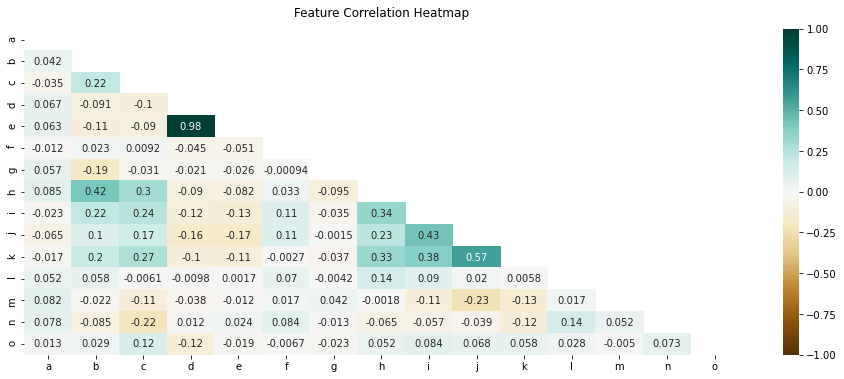

In [14]:
def heatmapFeatures(dataset):
    features_corr = dataset.iloc[:,0:-1].corr()

    plt.figure(figsize=(16, 6))
    mask = np.triu(np.ones_like(features_corr, dtype=np.bool))
    heatmap = sns.heatmap(features_corr,mask = mask,vmin=-1, vmax=1,annot=True,cmap='BrBG')

    heatmap.set_title('Feature Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

# We can see that D&E are strongly correlated, hence we can drop one of them.
heatmapFeatures(datasetWithRemovedRowsAllNumeric)

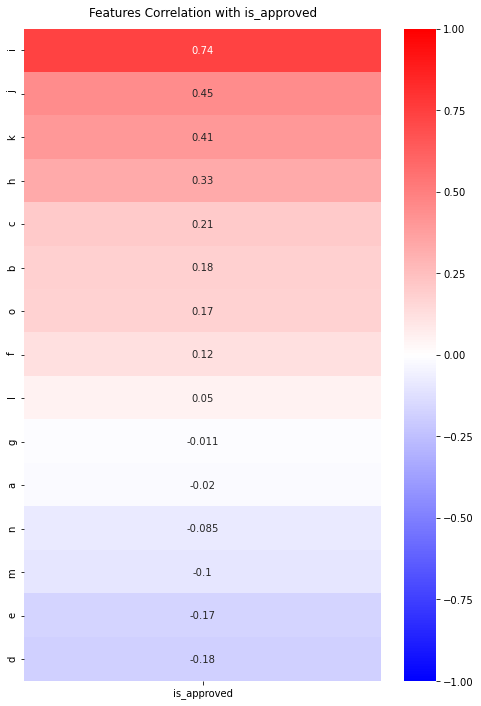

In [15]:
def heatmapFeaturesWithOutput(dataset):
  
    corr = dataset.corr().iloc[:, -1].sort_values(ascending=False)
    corr = pd.DataFrame(corr).iloc[1:,:]
    # Heatmap ranking
    plt.figure(figsize=(8, 12))
    heatmap = sns.heatmap(corr,vmin=-1, vmax=1,annot=True,cmap='bwr')

    heatmap.set_title('Features Correlation with {}'.format(dataset.columns[-1]),fontdict={'fontsize':12}, pad=12)

#G is the least correlated feature with target, followed by L&A.. hence we will drop them too
heatmapFeaturesWithOutput(datasetWithRemovedRowsAllNumeric)

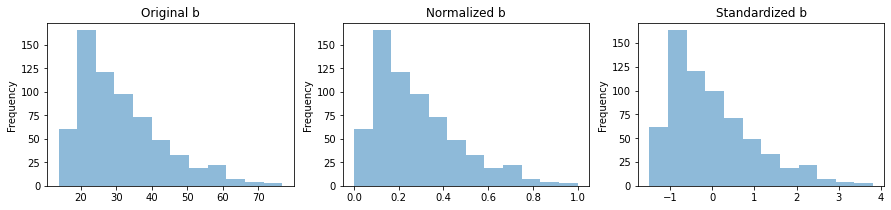

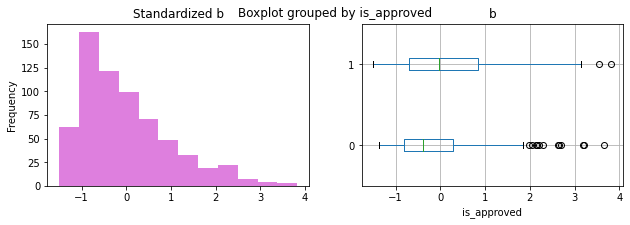

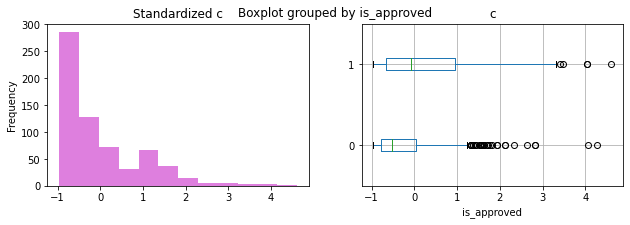

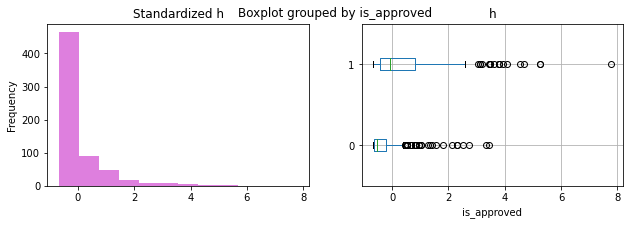

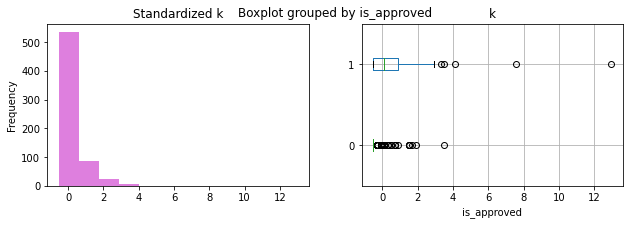

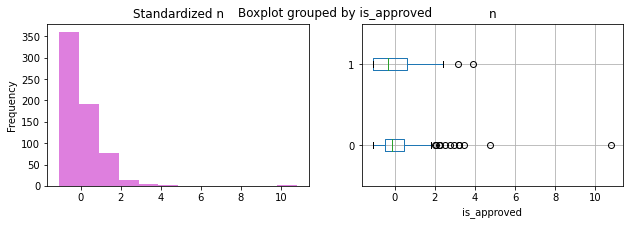

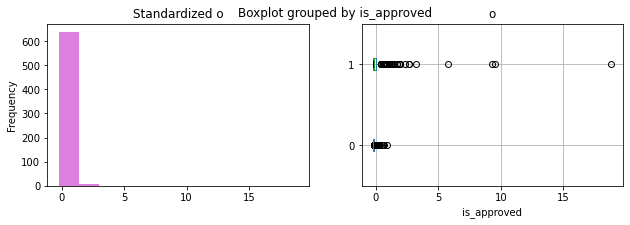

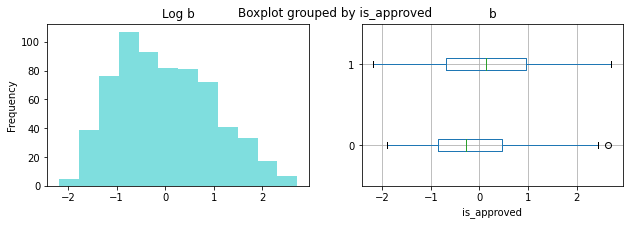

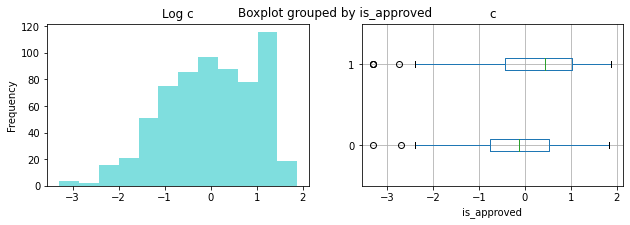

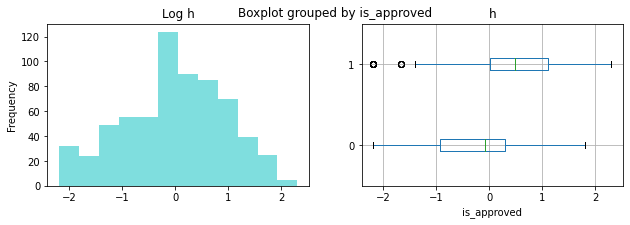

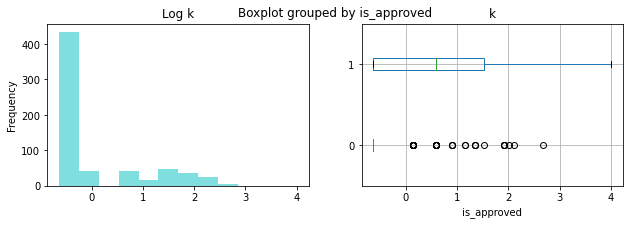

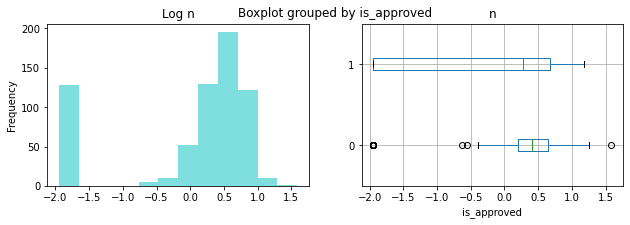

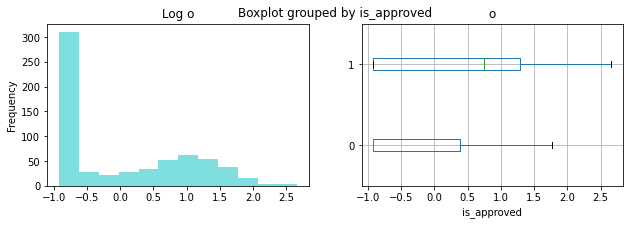

In [16]:
datasetWithRemovedRowsNormTransformed = datasetWithRemovedRows.copy(deep=True)
datasetWithRemovedRowsNormTransformed = normTransform(datasetWithRemovedRowsNormTransformed)

datasetWithRemovedRowsStandTransformed = datasetWithRemovedRows.copy(deep=True)
datasetWithRemovedRowsStandTransformed = standTransform(datasetWithRemovedRowsStandTransformed)

datasetWithRemovedRowsLogTransformed = datasetWithRemovedRows.copy(deep=True)
datasetWithRemovedRowsLogTransformed = logTransform(datasetWithRemovedRowsLogTransformed)
datasetWithRemovedRowsLogTransformed = standTransform(datasetWithRemovedRowsLogTransformed)

testColumn = continuousDataColumns[0]

plt.figure(figsize=(15,3))
plt.subplot(1, 3, 1)
plt.title('Original '+testColumn)
datasetWithRemovedRows[testColumn].plot.hist(bins=12, alpha=0.5)
plt.subplot(1, 3, 2)
plt.title('Normalized '+testColumn)
datasetWithRemovedRowsNormTransformed[testColumn].plot.hist(bins=12, alpha=0.5)
plt.subplot(1, 3, 3)
plt.title('Standardized '+testColumn)
datasetWithRemovedRowsStandTransformed[testColumn].plot.hist(bins=12, alpha=0.5)

for column in continuousDataColumns:
    fig, axes = plt.subplots(ncols=2, figsize=(10, 3), sharey=False)
    plt.subplot(1, 2, 1)
    plt.title('Standardized '+column)
    datasetWithRemovedRowsStandTransformed[column].plot.hist(bins=12, alpha=0.5, color="m")
    datasetWithRemovedRowsStandTransformed.boxplot(column=column, by='is_approved', vert=False, rot=0, return_type='axes', ax=axes[1])

for column in continuousDataColumns:
    fig, axes = plt.subplots(ncols=2, figsize=(10, 3), sharey=False)
    plt.subplot(1, 2, 1)
    plt.title('Log '+column)
    datasetWithRemovedRowsLogTransformed[column].plot.hist(bins=12, alpha=0.5, color="c")
    datasetWithRemovedRowsLogTransformed.boxplot(column=column, by='is_approved', vert=False, rot=0, return_type='axes', ax=axes[1])

<font color=blue size=4>7- Split Data.</font>

In [17]:
def splitInputOutput(dataset):
    yColumn = 'is_approved'
    X = dataset.loc[:, dataset.columns != yColumn].values
    y = dataset[yColumn].values
    return X,y

def splitTrainTestCrossValidate(X, y, model, splits, repeats = 1):
    allScores = {}
    trainTestSplitted = []
    for split in splits:
        # prepare the cross-validation procedure
        if repeats > 1:
            cv = RepeatedKFold(n_splits=split, n_repeats=repeats)
        else:
            cv = KFold(n_splits=split)
        # evaluate model
        scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
        allScores[split] = scores
        for train, test in cv.split(X):
            X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
            trainTestSplitted.append((X_train, X_test, y_train, y_test))
    return allScores, trainTestSplitted

def splitTrainTestCrossValidateWithGridSearch(X, y, model, splits):
    params = {'tol': [0.01,0.001,0.0001],'max_iter': [100,1000,10000]}
    scores = {}
    for split in splits:
        # evaluate model
        gridLogReg = GridSearchCV(estimator=model, param_grid=params, cv=split)
        gridLogRegFit = gridLogReg.fit(X, y)
        scores[split] = [gridLogReg.best_score_]
    return scores

## example of using train test split with cross validation

# # splits to try on dataset
# splits = [2, 3, 4, 5, 10] ## 50%/50%, 67%/33%, 75%/25%, 80%/20%, 90%/10%
# # repeat each split
# repeats = 3
# # create model
# model = LogisticRegression()
# # datasets has all generated datasets, pick one and split it into X and y
# X,y = splitInputOutput(datasets['after removing missing rows'])
# scores, trainTestSplitted = splitTrainTestCrossValidate(X, y, model, splits, repeats)
# # report performance
# print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
# for X_train, X_test, y_train, y_test in trainTestSplitted:
#     # each time, a different part is used as a testing slice while the rest is for training
#     print(X_train, X_test, y_train, y_test)

<font color=blue size=4>8- Model Data.</font>

In [18]:
def prepareDatasetForRegression(dataset, transformType):
    preparedDataset = dataset.copy(deep=True)
    preparedDataset = categoricalTransform(preparedDataset)
    if transformType == 'normalized':
        preparedDataset = normTransform(preparedDataset)
    elif transformType == 'standardized':
        preparedDataset = standTransform(preparedDataset)
    elif transformType == 'log':
        preparedDataset = logTransform(preparedDataset)
        preparedDataset = standTransform(preparedDataset)
    return splitInputOutput(preparedDataset)

@ignore_warnings(category=ConvergenceWarning)
def modelWithLogisticRegression():
    # transformations to try on dataset
    transformationTypes = ['none', 'normalized', 'standardized', 'log']
    # splits to try on dataset
    splits = [2, 3, 4, 5, 10] ## 50%/50%, 67%/33%, 75%/25%, 80%/20%, 90%/10%
    # repeat each split
    repeats = 1
    # create model
    model = LogisticRegression(solver='lbfgs')

    allScores = {}
    for datasetType in datasets.keys():
        if datasetType == 'original':
            continue
        allScores[datasetType] = {}
        for transformType in transformationTypes:
            allScores[datasetType][transformType] = {}
            dataset = datasets[datasetType]
            X, y = prepareDatasetForRegression(dataset, transformType)
            kFoldResult = splitTrainTestCrossValidate(X, y, model, splits, repeats)
            allScores[datasetType][transformType]['KFold'] = kFoldResult[0]
            gridSearchScores = splitTrainTestCrossValidateWithGridSearch(X, y, model, splits)
            allScores[datasetType][transformType]['GridSearch'] = gridSearchScores
            flatKFoldScores = np.concatenate(list(kFoldResult[0].values()))
            flatGridSearchScores = np.concatenate(list(gridSearchScores.values()))
            scores = np.concatenate((flatKFoldScores, flatGridSearchScores))
            print('Accuracy %s: %.3f%% avg (%.3f std) with %s transform' % (datasetType, np.mean(scores)*100, np.std(scores), transformType))
    return allScores

testResults = modelWithLogisticRegression()

Accuracy after removing missing rows: 80.866% avg (0.090 std) with none transform
Accuracy after removing missing rows: 85.858% avg (0.126 std) with normalized transform
Accuracy after removing missing rows: 85.055% avg (0.120 std) with standardized transform
Accuracy after removing missing rows: 84.363% avg (0.119 std) with log transform
Accuracy after calculating missing rows: 79.736% avg (0.090 std) with none transform
Accuracy after calculating missing rows: 84.900% avg (0.131 std) with normalized transform
Accuracy after calculating missing rows: 84.030% avg (0.124 std) with standardized transform
Accuracy after calculating missing rows: 83.505% avg (0.125 std) with log transform
Accuracy after predicting missing rows: 79.957% avg (0.092 std) with none transform
Accuracy after predicting missing rows: 84.910% avg (0.131 std) with normalized transform
Accuracy after predicting missing rows: 83.960% avg (0.124 std) with standardized transform
Accuracy after predicting missing rows: 

In [19]:
processedTestResults = deepcopy(testResults)
testResultsDataFrame = {}
testResultsDataFrameSplitsSummarized = {}
testResultsDataFrameTransformsSummarized = {}
testResultsDataFrameDatasetsSummarized = {}
for datasetType in testResults.keys():
    testResultsDataFrame[datasetType] = {}
    testResultsDataFrameSplitsSummarized[datasetType] = {}
    for transformType in testResults[datasetType].keys():
        if transformType not in testResultsDataFrameDatasetsSummarized.keys():
            testResultsDataFrameDatasetsSummarized[transformType] = 0
        testResultsDataFrameSplitsSummarized[datasetType][transformType] = {}
        for splitterType in testResults[datasetType][transformType].keys():
            for split in testResults[datasetType][transformType][splitterType].keys():
                splitAccuracy = testResults[datasetType][transformType][splitterType][split]
                processedTestResults[datasetType][transformType][splitterType][split] = np.round(np.mean(splitAccuracy)*100, 3)
            splitterAccuracies = list(processedTestResults[datasetType][transformType][splitterType].values())
            testResultsDataFrameSplitsSummarized[datasetType][transformType][splitterType] = np.max(splitterAccuracies)
        testResultsDataFrame[datasetType][transformType] = pd.DataFrame(processedTestResults[datasetType][transformType])
        testResultsDataFrameDatasetsSummarized[transformType] = np.max([testResultsDataFrameDatasetsSummarized[transformType], testResultsDataFrameSplitsSummarized[datasetType][transformType]['KFold']])
    testResultsDataFrame[datasetType] = pd.concat(testResultsDataFrame[datasetType]).unstack(0)
    datasetAccuracies = [acc['KFold'] for acc in testResultsDataFrameSplitsSummarized[datasetType].values()]
    testResultsDataFrameTransformsSummarized[datasetType.replace('after ', '').replace(' missing rows', '')] = np.max(datasetAccuracies)
    testResultsDataFrameSplitsSummarized[datasetType] = pd.DataFrame(testResultsDataFrameSplitsSummarized[datasetType])
testResultsDataFrame = pd.concat(testResultsDataFrame).unstack(0)
testResultsDataFrameSplitsSummarized = pd.concat(testResultsDataFrameSplitsSummarized).unstack(0)
testResultsDataFrameSplitsSummarized

none                                 \
           after removing missing rows after calculating missing rows   
KFold                           81.484                         79.864   
GridSearch                      85.653                         85.222   

                                          \
           after predicting missing rows   
KFold                             80.435   
GridSearch                        84.933   

                                                     \
           after unsupervised learning missing rows   
KFold                                        80.445   
GridSearch                                   85.659   

                                                             normalized  \
           after deep learning missing rows after removing missing rows   
KFold                                79.723                      86.830   
GridSearch                           85.222                      86.088   

                                                                         \
           after calculating missing rows after predicting missing rows   
KFold                              86.087                        86.087   
GridSearch                         85.507                        85.507   

                                                     \
           after unsupervised learning missing rows   
KFold                                        85.521   
GridSearch                                   85.797   

                                                           standardized  \
           after deep learning missing rows after removing missing rows   
KFold                                85.942                      87.596   
GridSearch                           85.362                      85.958   

                                                                         \
           after calculating missing rows after predicting missing rows   
KFold                              85.942                        85.797   
GridSearch                         84.928                        84.928   

                                                     \
           after unsupervised learning missing rows   
KFold                                        85.072   
GridSearch                                   85.368   

                                                                    log  \
           after deep learning missing rows after removing missing rows   
KFold                                86.087                      87.134   
GridSearch                           85.076                      85.605   

                                                                         \
           after calculating missing rows after predicting missing rows   
KFold                              86.087                        85.942   
GridSearch                         84.348                        84.203   

                                                     \
           after unsupervised learning missing rows   
KFold                                        85.507   
GridSearch                                   84.348   

                                             
           after deep learning missing rows  
KFold                                85.942  
GridSearch                           84.348

In [20]:
testResultsDataFrame['KFold']

none                                 \
   after removing missing rows after calculating missing rows   
2                       78.413                         74.348   
3                       80.403                         77.101   
4                       81.484                         79.864   
5                       78.732                         78.986   
10                      80.138                         79.565   

                                                                           \
   after predicting missing rows after unsupervised learning missing rows   
2                         75.507                                   79.130   
3                         76.957                                   79.710   
4                         79.575                                   80.445   
5                         80.435                                   80.290   
10                        79.420                                   78.986   

                                                     normalized  \
   after deep learning missing rows after removing missing rows   
2                            74.638                      86.530   
3                            79.420                      86.830   
4                            79.723                      85.778   
5                            77.971                      85.615   
10                           79.420                      85.506   

                                                                 \
   after calculating missing rows after predicting missing rows   
2                          85.217                        85.362   
3                          86.087                        86.087   
4                          84.796                        84.796   
5                          84.638                        84.638   
10                         84.493                        84.493   

                                                                              \
   after unsupervised learning missing rows after deep learning missing rows   
2                                    83.043                           84.783   
3                                    85.507                           85.942   
4                                    85.521                           84.796   
5                                    84.348                           84.348   
10                                   83.768                           84.638   

                  standardized                                 \
   after removing missing rows after calculating missing rows   
2                       86.070                         84.348   
3                       87.596                         85.942   
4                       84.706                         84.071   
5                       84.085                         83.478   
10                      84.585                         83.478   

                                                                           \
   after predicting missing rows after unsupervised learning missing rows   
2                         84.348                                   84.203   
3                         85.797                                   85.072   
4                         83.782                                   84.797   
5                         83.333                                   83.623   
10                        83.478                                   83.768   

                                                            log  \
   after deep learning missing rows after removing missing rows   
2                            84.783                      85.454   
3                            86.087                      87.134   
4                            83.928                      84.396   
5                            83.043                      83.470   
10                           83.333                      83.657   

                                                               

In [21]:
testResultsDataFrame['GridSearch']

none                                 \
   after removing missing rows after calculating missing rows   
2                       85.607                         84.493   
3                       84.686                         83.913   
4                       85.320                         85.222   
5                       84.839                         84.203   
10                      85.653                         84.493   

                                                                           \
   after predicting missing rows after unsupervised learning missing rows   
2                         84.638                                   84.783   
3                         83.913                                   83.768   
4                         84.933                                   85.659   
5                         84.058                                   85.217   
10                        84.638                                   85.072   

                                                     normalized  \
   after deep learning missing rows after removing missing rows   
2                            84.928                      86.066   
3                            84.203                      85.909   
4                            85.222                      86.088   
5                            84.203                      86.063   
10                           84.493                      85.960   

                                                                 \
   after calculating missing rows after predicting missing rows   
2                          85.507                        85.507   
3                          84.638                        84.638   
4                          85.223                        85.223   
5                          85.217                        85.217   
10                         85.507                        85.507   

                                                                              \
   after unsupervised learning missing rows after deep learning missing rows   
2                                    85.797                           85.362   
3                                    84.348                           84.638   
4                                    85.368                           84.933   
5                                    84.928                           85.217   
10                                   85.072                           85.072   

                  standardized                                 \
   after removing missing rows after calculating missing rows   
2                       85.607                         84.638   
3                       84.686                         83.768   
4                       85.473                         84.642   
5                       84.839                         83.913   
10                      85.958                         84.928   

                                                                           \
   after predicting missing rows after unsupervised learning missing rows   
2                         84.493                                   84.493   
3                         84.058                                   83.768   
4                         84.642                                   85.368   
5                         84.058                                   84.928   
10                        84.928                                   85.072   

                                                            log  \
   after deep learning missing rows after removing missing rows   
2                            84.928                      85.605   
3                            84.058                      84.069   
4                            85.076                      84.706   
5                            84.348                      84.222   
10                           84.638                      84.112   

                                                               

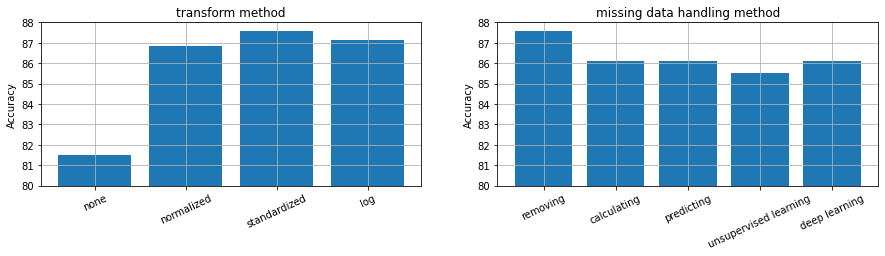

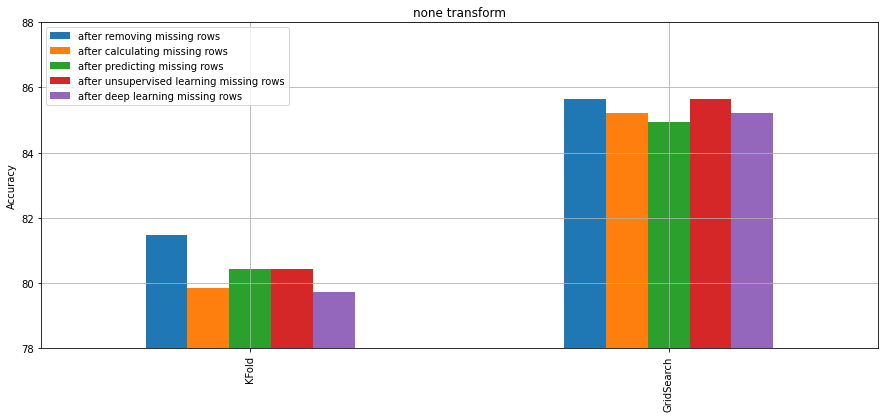

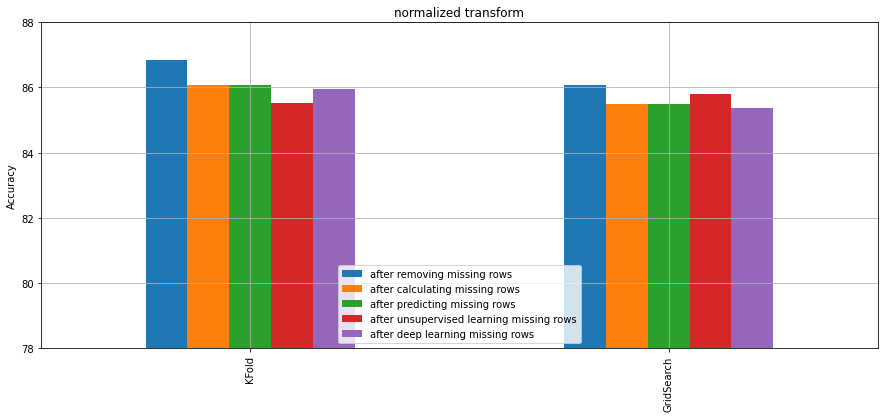

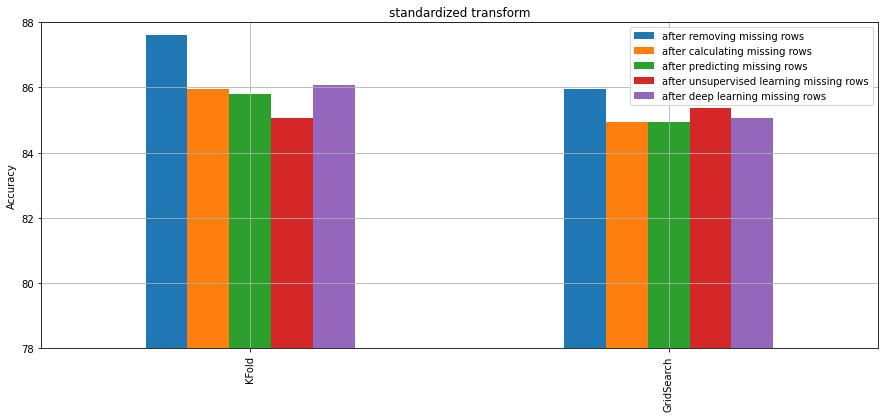

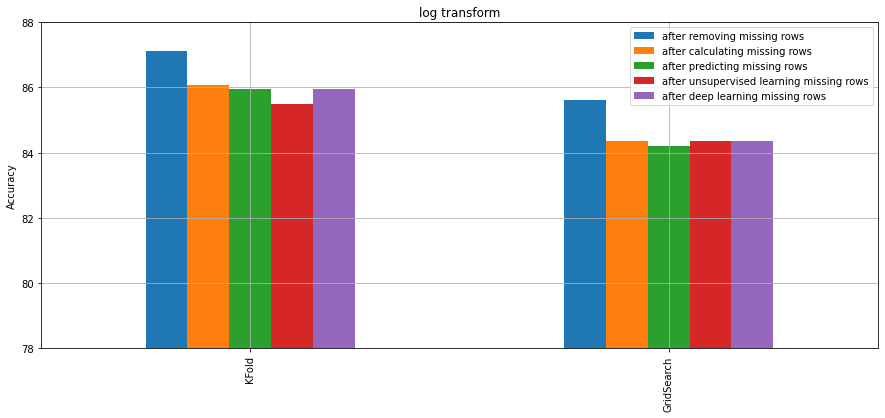

In [24]:
def plotSummary(summary):
    plt.bar(summary.keys(), summary.values())
    plt.ylabel('Accuracy')
    plt.grid()
    plt.xticks(rotation=25)
    plt.ylim(80, 88)

plt.figure(figsize=(15,3))
plt.subplot(1, 2, 1)
plt.title("transform method")
plotSummary(testResultsDataFrameDatasetsSummarized)
plt.subplot(1, 2, 2)
plt.title("missing data handling method")
plotSummary(testResultsDataFrameTransformsSummarized)

transformationTypes = ['none', 'normalized', 'standardized', 'log']
for transformType in transformationTypes:
    testResultsDataFrameSplitsSummarized[transformType].plot.bar(figsize=(15,6), title=transformType+" transform")
    plt.ylabel('Accuracy')
    plt.grid()
    plt.ylim(78, 88)

(70.0, 90.0)

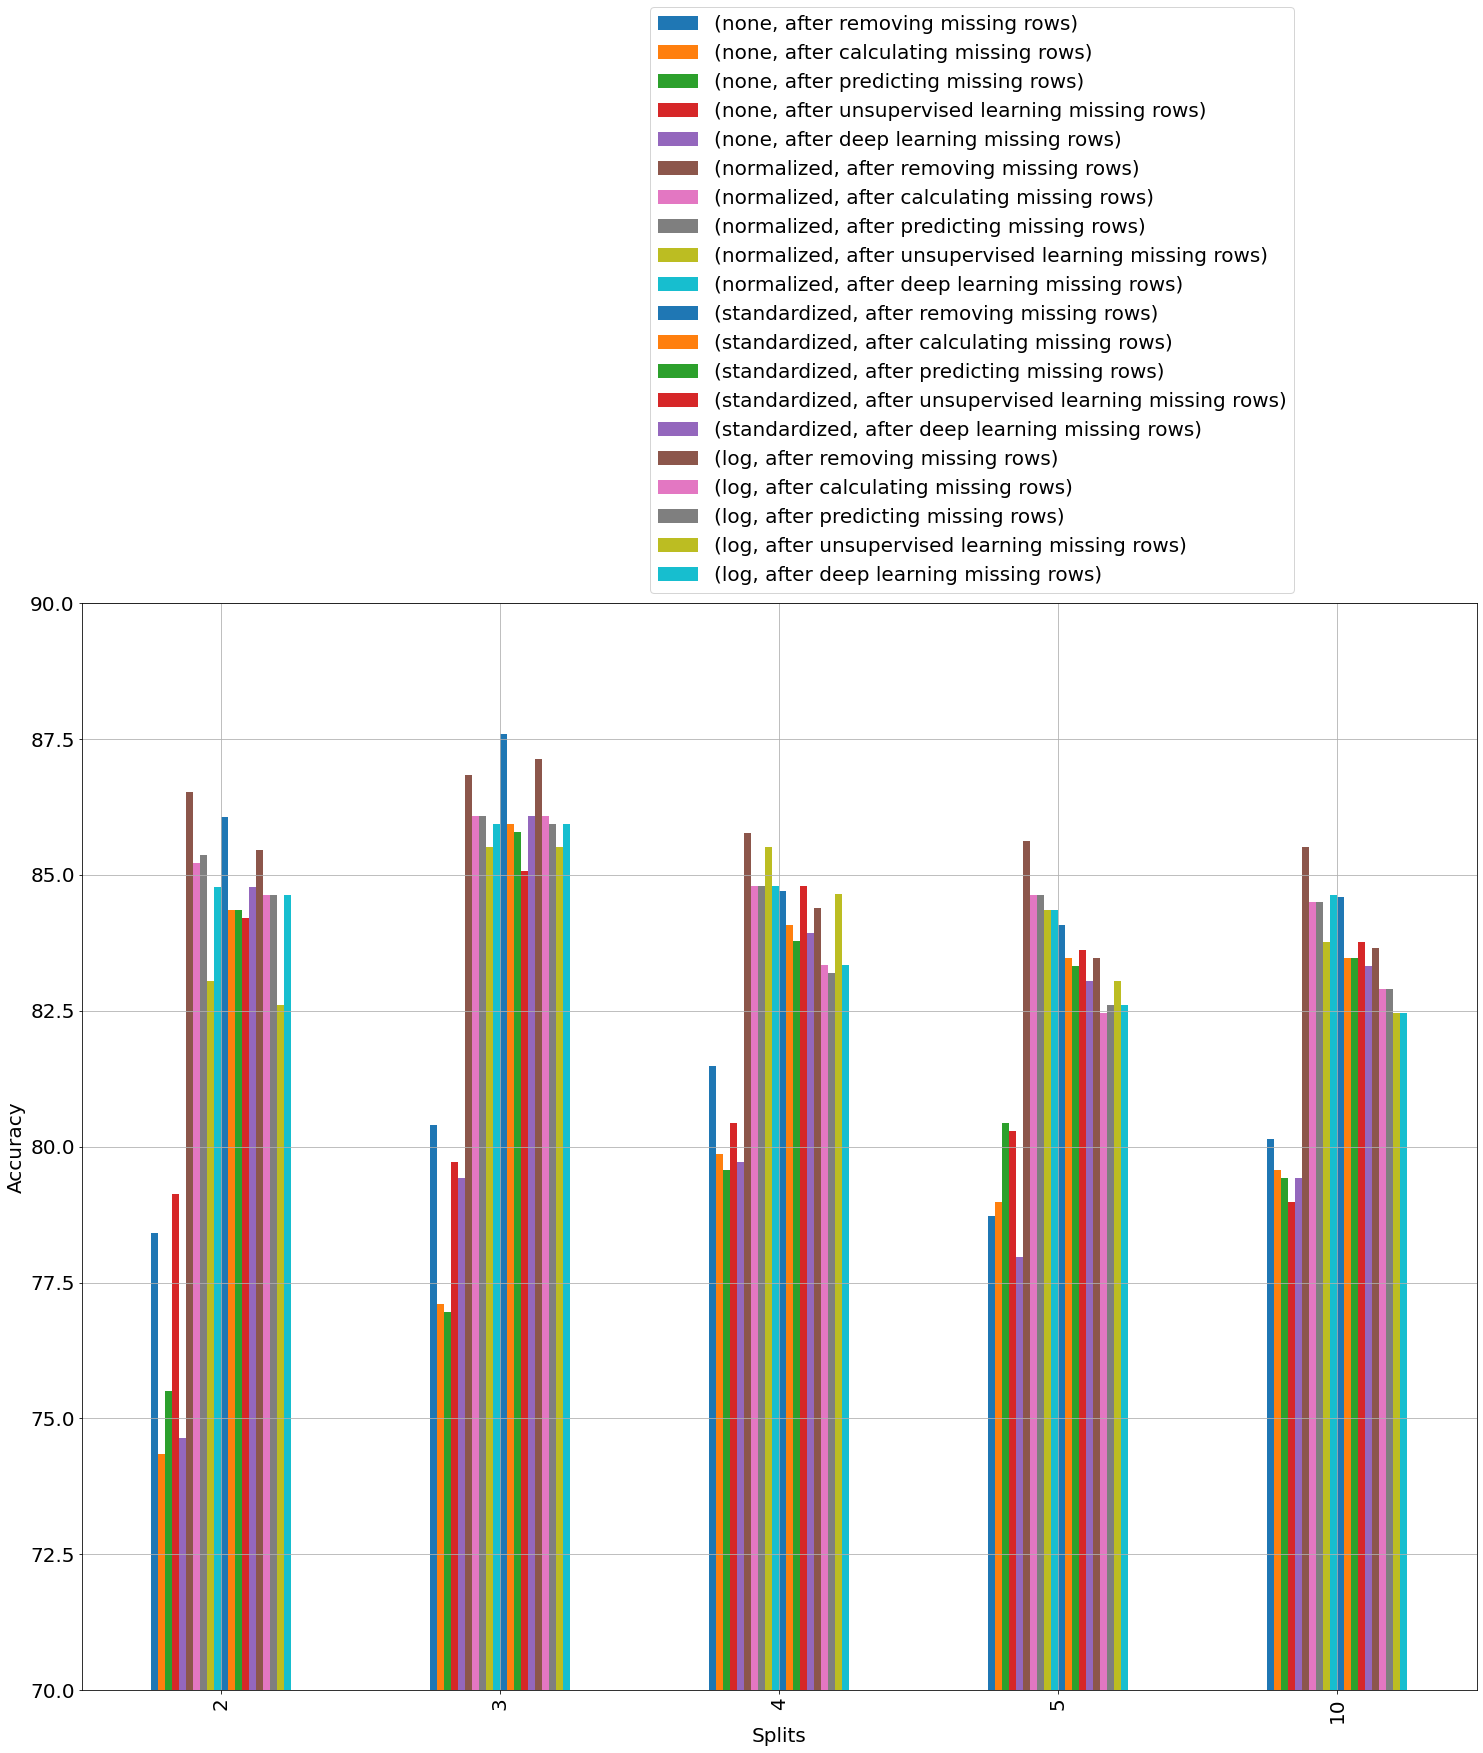

In [25]:
testResultsDataFrame['KFold'].plot.bar(figsize=(25,20), fontsize=20)
plt.legend(bbox_to_anchor=(0.4, 1.0), prop={'size': 20})
plt.ylabel('Accuracy', fontsize=20)
plt.xlabel('Splits', fontsize=20)
plt.grid()
plt.ylim(70, 90)